In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# user defined input values
MinTemp = 32
DayTemp = '2018-12-16'

In [3]:
# Reads in csv file and skips first 9 rows.
data = pd.read_csv('B582127C.csv', skiprows=range(0,4), date_parser = pd.to_datetime)
data[0:3]

,P1,P2,Time,Date
0,22.04,0.0,10:00,12/17/18
1,22.02,0.0,09:45,12/17/18
2,22.05,0.0,09:30,12/17/18


In [4]:
# This code replaces Celsius to Fahrenheit in column 1. 
# If you need to change to any other column, then just change red 'P1' to new column name
def f(x):
    x = (x * 1.8) + 32
    return float(x)

data['P1'] = data['P1'].apply(f)

In [5]:
data[0:3]

,P1,P2,Time,Date
0,71.672,0.0,10:00,12/17/18
1,71.636,0.0,09:45,12/17/18
2,71.690,0.0,09:30,12/17/18


In [6]:
# create variable with minimum allowable temp
cold = data['P1'] <= MinTemp

In [7]:
temp = data['P1'].values

In [8]:
# create variable with date of interest
date = data['Date'] == DayTemp

In [9]:
# Average of all temp values
print(np.mean(data['P1'], axis=0))

68.4463866171


In [10]:
# minimum of all temperature values
print(np.min(data['P1'], axis=0))

66.254


In [11]:
# maximum of all temperature values
print(np.max(data['P1'], axis=0))

73.49000000000001


In [12]:
# converts Date text to a number Python can read
data['Date'] = pd.to_datetime(data.Date)

In [13]:
# Verify date has changed, note this shows outliers in data
data[190:201]

,P1,P2,Time,Date
190,69.116,0.0,10:30,2018-12-15
191,69.080,0.0,10:15,2018-12-15
192,69.062,0.0,10:00,2018-12-15
193,69.044,0.0,09:45,2018-12-15
194,69.008,0.0,09:30,2018-12-15
195,68.990,0.0,09:15,2018-12-15
196,68.954,0.0,09:00,2018-12-15
197,69.080,0.0,08:45,2018-12-15
198,69.152,0.0,08:30,2018-12-15
199,69.152,0.0,08:15,2018-12-15


In [14]:
# Create date variable. 
date = data['Date'] == DayTemp

In [15]:
# initializes all values for that day
Day = data[date].values
Day

array([[66.614, 0.0, '23:45', Timestamp('2018-12-16 00:00:00')],
       [66.65, 0.0, '23:30', Timestamp('2018-12-16 00:00:00')],
       [66.668, 0.0, '23:15', Timestamp('2018-12-16 00:00:00')],
       [66.70400000000001, 0.0, '23:00',
        Timestamp('2018-12-16 00:00:00')],
       [66.72200000000001, 0.0, '22:45',
        Timestamp('2018-12-16 00:00:00')],
       [66.758, 0.0, '22:30', Timestamp('2018-12-16 00:00:00')],
       [66.794, 0.0, '22:15', Timestamp('2018-12-16 00:00:00')],
       [66.848, 0.0, '22:00', Timestamp('2018-12-16 00:00:00')],
       [66.884, 0.0, '21:45', Timestamp('2018-12-16 00:00:00')],
       [66.938, 0.0, '21:30', Timestamp('2018-12-16 00:00:00')],
       [66.974, 0.0, '21:15', Timestamp('2018-12-16 00:00:00')],
       [67.04599999999999, 0.0, '21:00',
        Timestamp('2018-12-16 00:00:00')],
       [67.1, 0.0, '20:45', Timestamp('2018-12-16 00:00:00')],
       [67.19, 0.0, '20:30', Timestamp('2018-12-16 00:00:00')],
       [67.28, 0.0, '20:15', Timestam

In [16]:
# minimum temp value for given day
Tempmin = (np.min(Day[:,0]))
Tempmin

66.254

In [17]:
# maximum temp value for given day
Tempmax = (np.max(Day[:,0], axis=0))
Tempmax

67.37

In [18]:
# average temp value for given day
Tempmean = (np.mean(Day[:,0], axis=0))
Tempmean

66.81612500000001

In [19]:
newVar = [Day[:,0] , Day[:,2]]
a = np.array(newVar)[np.newaxis]

In [20]:
# Counts number of low temps within data set
NumLowTemps = data[data < MinTemp].count()
NumLowTemps

P1        0
P2      269
Time      0
Date    269
dtype: int64

In [21]:
# Counts number of high temps within data set
NumHighTemps = data[data > 100].count()
NumHighTemps

P1        0
P2        0
Time    269
Date    269
dtype: int64

In [22]:
# Groups temperatures by time and date. 
Grouped = data.groupby(['Date', 'P1'], sort=False)
Grouped.last()

P2   Time
Date       P1                
2018-12-17 71.672  0.0  10:00
           71.636  0.0  09:45
           71.690  0.0  09:30
           71.582  0.0  09:15
           71.492  0.0  09:00
           71.384  0.0  08:45
           71.240  0.0  08:30
           71.132  0.0  08:15
           70.952  0.0  08:00
           70.646  0.0  07:45
           70.286  0.0  07:30
           69.854  0.0  07:15
           69.458  0.0  07:00
           69.044  0.0  06:45
           68.486  0.0  06:30
           67.568  0.0  06:15
           66.434  0.0  02:00
           66.326  0.0  05:45
           66.362  0.0  04:00
           66.380  0.0  02:45
           66.344  0.0  03:30
           66.398  0.0  02:30
           66.416  0.0  02:15
           66.470  0.0  01:30
           66.506  0.0  01:15
           66.524  0.0  01:00
           66.542  0.0  00:45
           66.560  0.0  00:30
           66.578  0.0  00:00
2018-12-16 66.614  0.0  04:00
...                ...    ...
2018-12-14 71.348  0.0  22:15
           71.420  0.0  22:00
           71.438  0.0  21:45
           71.456  0.0  21:30
           71.492  0.0  21:15
           71.546  0.0  21:00
           71.510  0.0  20:45
           71.564  0.0  20:30
           71.654  0.0  20:15
           71.744  0.0  20:00
           71.816  0.0  19:45
           71.870  0.0  19:30
           71.942  0.0  19:15
           72.050  0.0  19:00
           72.158  0.0  18:45
           72.266  0.0  18:30
           72.374  0.0  18:15
           72.518  0.0  18:00
           72.716  0.0  17:45
           72.842  0.0  17:30
           72.860  0.0  17:15
           72.896  0.0  17:00
           72.950  0.0  16:45
           73.022  0.0  16:30
           73.076  0.0  16:15
           73.184  0.0  16:00
           73.400  0.0  15:45
           73.346  0.0  15:30
           73.490  0.0  15:15
           73.454  0.0  15:00

[198 rows x 2 columns]

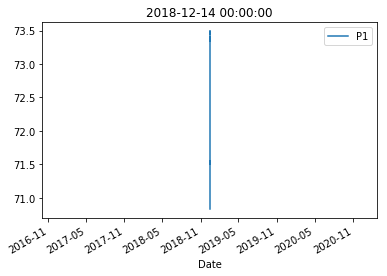

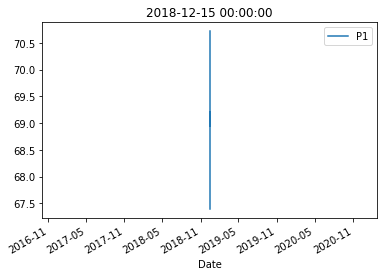

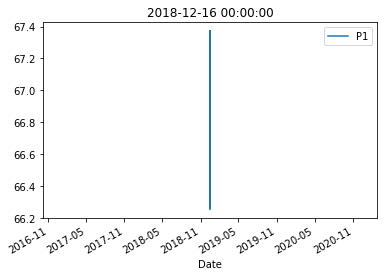

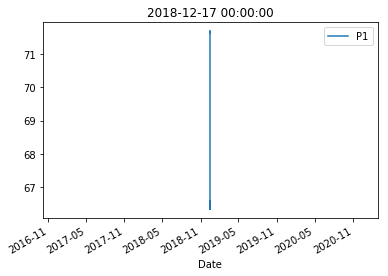

In [23]:
for title, group in data.groupby('Date'):
    group.plot(x='Date', y='P1', title=title)

In [24]:
result = [g[1] for g in list(Grouped)[:21]]
result

[       P1   P2   Time       Date
 0  71.672  0.0  10:00 2018-12-17,        P1   P2   Time       Date
 1  71.636  0.0  09:45 2018-12-17,       P1   P2   Time       Date
 2  71.69  0.0  09:30 2018-12-17,        P1   P2   Time       Date
 3  71.582  0.0  09:15 2018-12-17,        P1   P2   Time       Date
 4  71.492  0.0  09:00 2018-12-17,        P1   P2   Time       Date
 5  71.384  0.0  08:45 2018-12-17,       P1   P2   Time       Date
 6  71.24  0.0  08:30 2018-12-17,        P1   P2   Time       Date
 7  71.132  0.0  08:15 2018-12-17,        P1   P2   Time       Date
 8  70.952  0.0  08:00 2018-12-17,        P1   P2   Time       Date
 9  70.646  0.0  07:45 2018-12-17,         P1   P2   Time       Date
 10  70.286  0.0  07:30 2018-12-17,         P1   P2   Time       Date
 11  69.854  0.0  07:15 2018-12-17,         P1   P2   Time       Date
 12  69.458  0.0  07:00 2018-12-17,         P1   P2   Time       Date
 13  69.044  0.0  06:45 2018-12-17,         P1   P2   Time       Date
 14  68.4

In [25]:
Grouped = data.groupby(['Date', 'P1'])
Grouped.get_group((list(Grouped.groups)[0])).groupby(['P2','Time'])

In [ ]:
# Something from internet 
# data.groupby(allColumns)[columnImInterestedInForStats].describe()

# Someone's response

# import pandas as pd
# import numpy as np

# df = pd.DataFrame([[1.1, 1.1, 1.1, 2.6, 2.5, 3.4,2.6,2.6,3.4,3.4,2.6,1.1,1.1,3.3], list('AAABBBBABCBDDD'), \
#                    ['1','3','3','2','4','2','5','3','6','3','5','1','1','1']]).T
# df.columns = ['col1','col2','col3']
# df['col1'] = df['col1'].astype(float)

# df.groupby(['col2','col3'])['col1'].agg([np.mean,'count',np.max,np.min,np.median])

In [29]:
data['P1'] = data['P1'].astype(float)
#data['Time'] = data['Time'].astype(float)
# data['Date'] = data['Date'].astype(float)

data.groupby(['P1' , 'Date'])['Time'].agg([np.mean,'count',np.max,np.min,np.median])

DataError: No numeric types to aggregate